<a href="https://colab.research.google.com/github/javed163/Deep-Learning/blob/main/Early_Stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import warnings
import tensorflow
import seaborn as sns
from pylab import rcParams
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [11]:
x, y = make_circles(n_samples = 100, random_state = 42, noise= 0.1)

<Axes: xlabel='x', ylabel='y'>

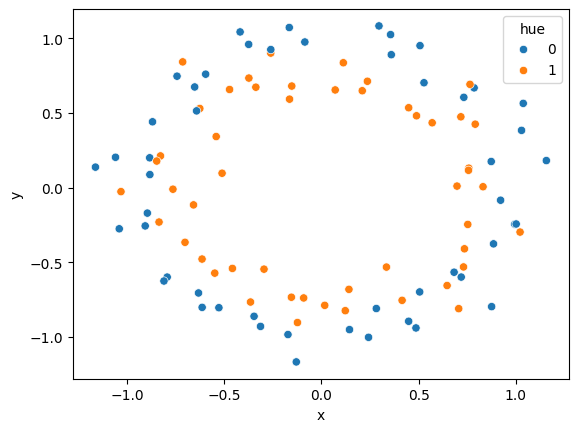

In [13]:
# Create a DataFrame with columns for x and y values
data = {'x': x[:,0], 'y': x[:,1], 'hue': y}
df = pd.DataFrame(data)

# Use the 'x' and 'y' columns of the DataFrame as arguments
sns.scatterplot(x='x', y='y', hue='hue', data=df)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [15]:
model = Sequential()
model.add(Dense(256, input_dim = 2, activation = 'relu'))
model.add(Dense(1, activation  = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [22]:
histry = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 500, verbose = 0)


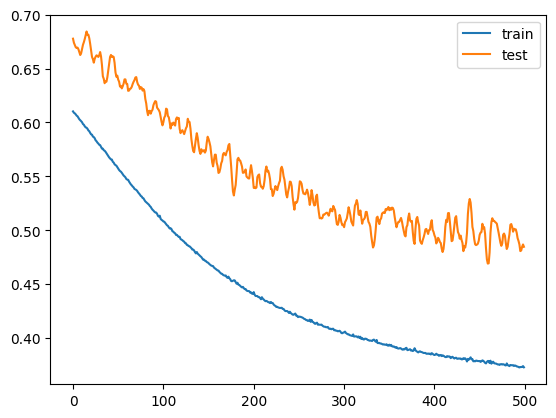

In [23]:
plt.plot(histry.history['loss'], label = 'train')
plt.plot(histry.history['val_loss'], label = 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


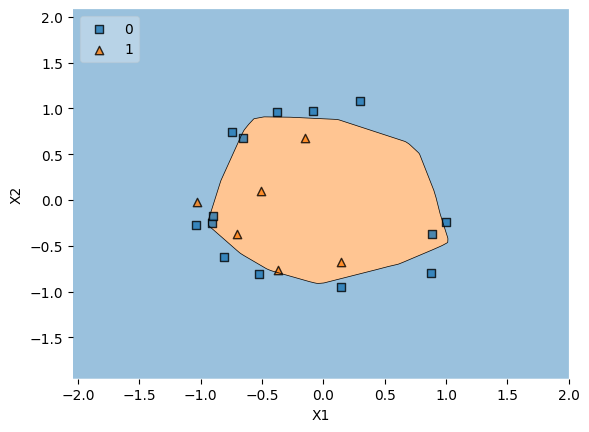

In [25]:
plot_decision_regions(x_test, y_test.ravel(), clf = model, legend = 2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [29]:
model = Sequential()
model.add(Dense(256, input_dim = 2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [30]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [31]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.0001,
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [35]:
histry = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 500, callbacks = callback)


Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8305 - loss: 0.3933 - val_accuracy: 0.7500 - val_loss: 0.4999
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8266 - loss: 0.3974 - val_accuracy: 0.7500 - val_loss: 0.5005
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8164 - loss: 0.3867 - val_accuracy: 0.7500 - val_loss: 0.5023
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7844 - loss: 0.3893 - val_accuracy: 0.7500 - val_loss: 0.5108
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7789 - loss: 0.4174 - val_accuracy: 0.7500 - val_loss: 0.5105
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7828 - loss: 0.4114 - val_accuracy: 0.7500 - val_loss: 0.5082
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7945 - loss: 0.3881 - val_accuracy: 0.7500 - val_loss: 0.5029
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7969 - loss: 0.3974 - val_accuracy: 0.7500 - val_loss:

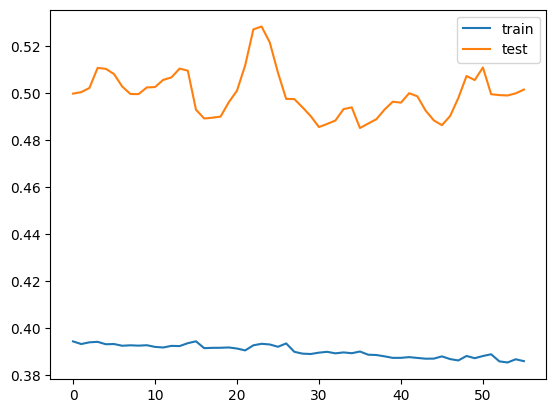

In [36]:
plt.plot(histry.history['loss'], label = 'train')
plt.plot(histry.history['val_loss'], label = 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


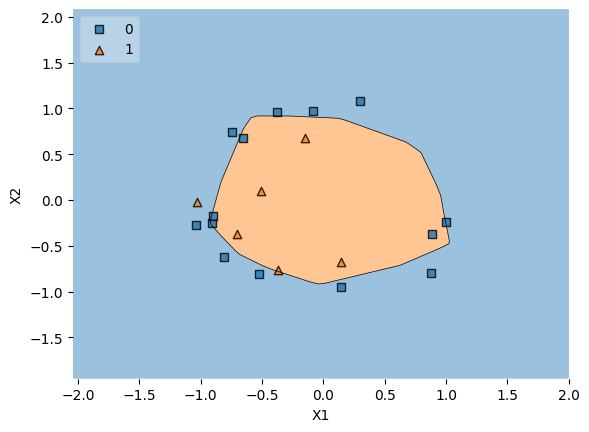

In [37]:
plot_decision_regions(x_test, y_test.ravel(), clf = model, legend = 2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()